# <h1 style= "text-align: center;">Programmatic Data Wrangling - TMDB</h1>

<h2 style= "text-align: center;">By Liam Dearlove</h2>

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [3]:
# Load the dataset into a dataframe
dataset = "TMDB_movies.csv"

df = pd.read_csv(dataset)

In [211]:
df.reset_index()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[Action, Crime, Thriller]"
4799,4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]"
4800,4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]"
4801,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[]


In [4]:
# Checking number of rows and columns
df.shape

(4803, 20)

In [212]:
# Checking the data type for each column
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
extracted_genres         object
dtype: object

In [6]:
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [8]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
# Check if all unique titles
unique_titles = df['title'].unique()

len(unique_titles)

4800

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...",...,2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817,"[Action, Adventure, Romance, Science Fiction, ..."
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...",...,2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537,"[Horror, Drama, Science Fiction]"


In [11]:
unique = set(unique_titles)

strip = set()

for name in unique:
    strip.add(name.lower().strip())

len(strip)

4800

Length of unqiue titles and stripped titles is the same therefore there are no repeat titles in the dataset.

In [213]:
top_10_revenue = df[['title', 'revenue', 'genres']].copy().sort_values('revenue', ascending = False ).head(10)
top_10_revenue[['title', 'revenue']]

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


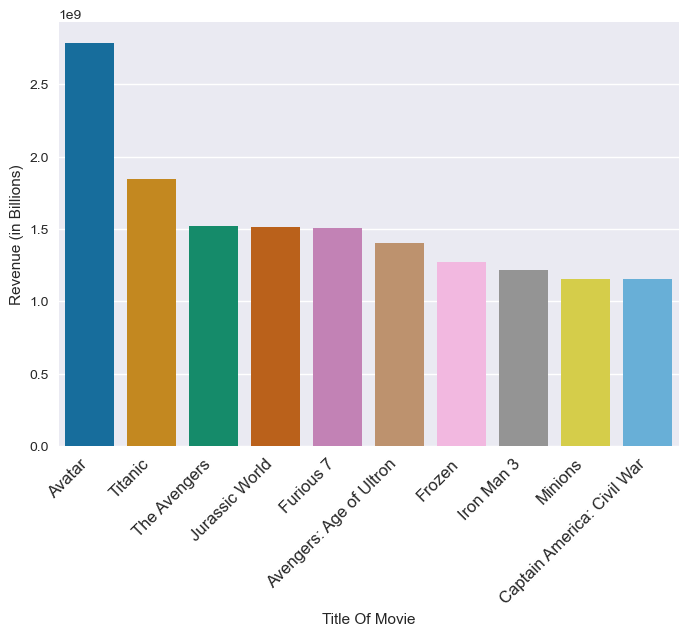

In [124]:
sns.barplot(x = 'title',
            y = 'revenue',
           data = top_10_revenue,
           palette='colorblind')

plt.xlabel("Title Of Movie")
plt.ylabel("Revenue (in Billions)")

plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize =  'large' # setting the fonts
          )
plt.show()

In [138]:
# Code to extract genres and then drop the columns with the list of dictionaries
# top_10_revenue['extracted_genres'] = top_10_revenue['genres'].apply(extract_genres)
# top_10_revenue.drop(columns=['genres'], inplace = True)

top_10_revenue= top_10_revenue.rename(columns= {"extracted_genres":"genres"})
top_10_revenue

,title,revenue,genres
0,Avatar,2787965087,"[Action, Adventure, Fantasy, Science Fiction]"
25,Titanic,1845034188,"[Drama, Romance, Thriller]"
16,The Avengers,1519557910,"[Science Fiction, Action, Adventure]"
28,Jurassic World,1513528810,"[Action, Adventure, Science Fiction, Thriller]"
44,Furious 7,1506249360,[Action]
7,Avengers: Age of Ultron,1405403694,"[Action, Adventure, Science Fiction]"
124,Frozen,1274219009,"[Animation, Adventure, Family]"
31,Iron Man 3,1215439994,"[Action, Adventure, Science Fiction]"
546,Minions,1156730962,"[Family, Animation, Adventure, Comedy]"
26,Captain America: Civil War,1153304495,"[Adventure, Action, Science Fiction]"


In [131]:
top_10_exploded = top_10_revenue.explode('genres')

top10_counts = top_10_exploded['genres'].value_counts()
five_genres = top10_counts.head(5)
five_genres

genres
Adventure          8
Action             7
Science Fiction    6
Thriller           2
Animation          2
Name: count, dtype: int64

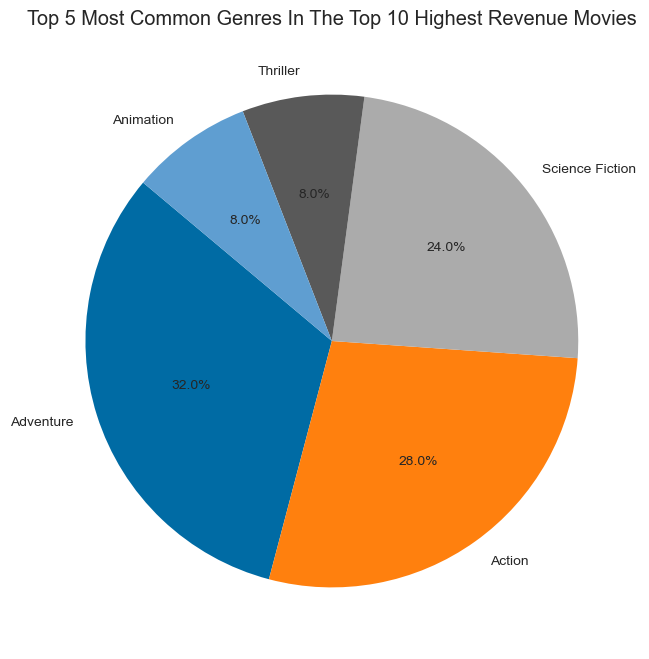

In [222]:
plt.figure(figsize=(8, 8))
plt.pie(five_genres.values, labels=five_genres.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Genres In The Top 10 Highest Revenue Movies")
plt.style.use('tableau-colorblind10')
plt.show()

In [14]:
## Function to extract genres for each datapoint

def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

The above code creates a function to extract the genres from the list of dictionaries that they are stored in and put them into a list. From there, each list is added to a new column called 'extracted_genres'.

In [16]:
# Expand the dataset out so that there is a single row for each genre
df_genres = df.explode('extracted_genres')
df_genres

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Drama
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Romance
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", "

In [57]:
# Count up the number of each genre
genre_counts = df_genres['extracted_genres'].value_counts()
genre_counts

extracted_genres
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64

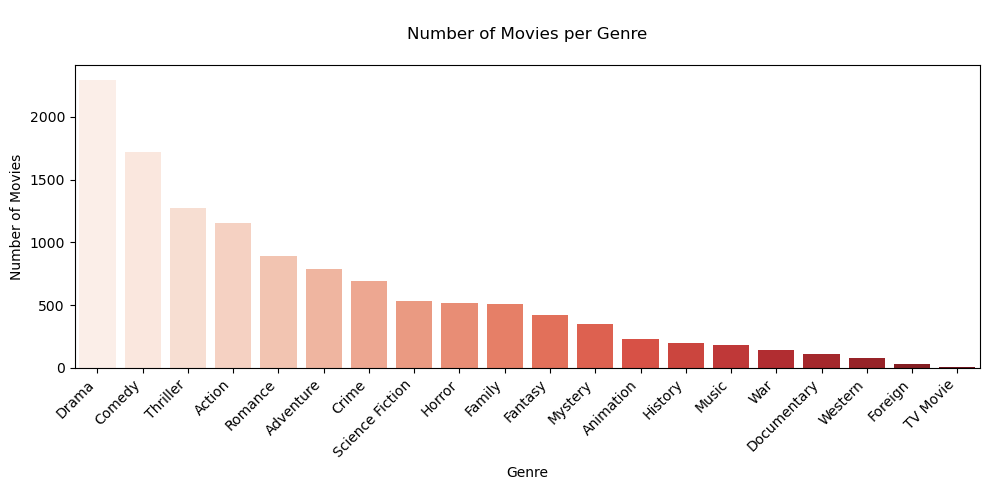

In [58]:
# Graph to show the number of movies per individual genre

genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['Genre', 'Count']


plt.figure(figsize=(10,5))
sns.barplot(x='Genre', 
            y='Count', 
            data=genre_counts_df, 
            palette='Reds')

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('\nNumber of Movies per Genre\n')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusts padding in and around the graph- makes it look nicer!

plt.show()

The above graph shows that drama is the most commonly occurring genre.

In [182]:
new_df = df[['budget', 'revenue']].copy()
new_df

,budget,revenue
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609
3,250000000,1084939099
4,260000000,284139100
...,...,...
4798,220000,2040920
4799,9000,0
4800,0,0
4801,0,0


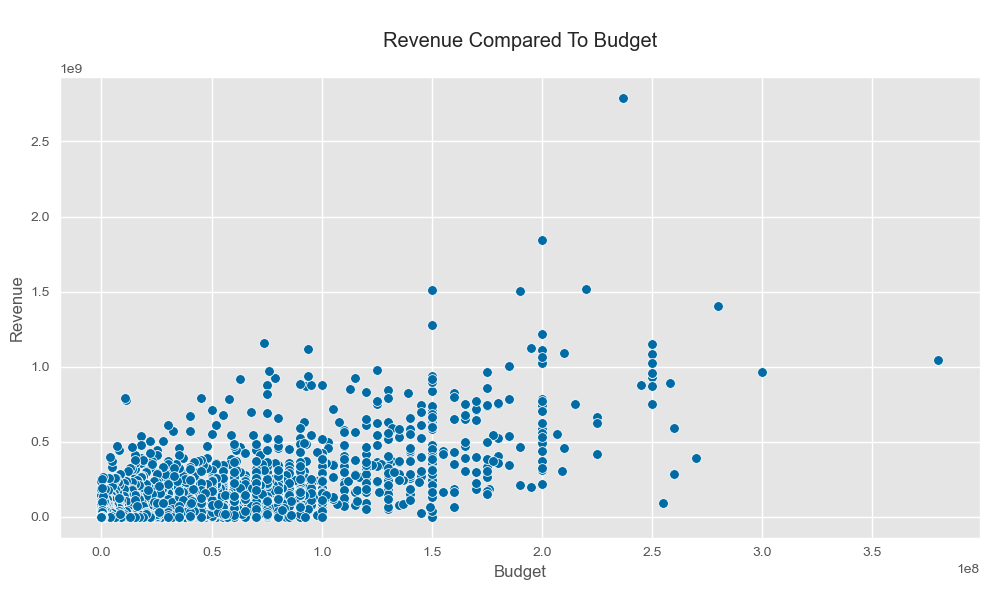

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', 
                y='revenue', 
                data=new_df,
               )
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('\nRevenue Compared To Budget\n')
plt.tight_layout()
plt.show()

In [216]:
new_df.corr(numeric_only=True)

,budget,revenue
budget,1.000000,0.730823
revenue,0.730823,1.000000


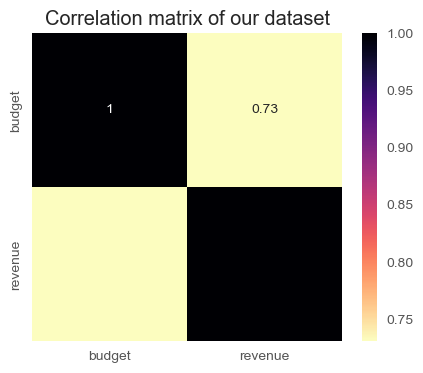

In [221]:
plt.figure(figsize = (5,4))

sns.heatmap(new_df.corr(),

            annot = True,

            cmap = 'magma_r',

)

plt.title("Correlation matrix of our dataset")

plt.show()

From the graph and correlation map, we can see no real correlation between budget and revenue. However, 2 things that stand out from the graph are that there are film with 0 budget making nearly 250 million in revenue and some films with budgets of 150 million making 0 in revenue.

In [145]:
df[(df['revenue'] == 0) & (df['vote_average'] == 10)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,[Comedy]
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,"[Romance, Comedy, Drama]"
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,[Comedy]


In [199]:
# Films where budget is 0 but the film made money
budget_df = df[(df['budget'] == 0)].copy()
budget_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,"[Comedy, Fantasy, Family]"
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",...,2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,[Comedy]
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428,"[Adventure, Animation, Comedy, Family]"
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",http://www.arthurchristmas.com/,51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2011-02-22,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.7,333,"[Drama, Animation, Family, Comedy]"
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85,"[Drama, Music]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",...,1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,6.0,1,[Drama]
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],...,2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2,"[Foreign, Thriller]"
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]"
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[]

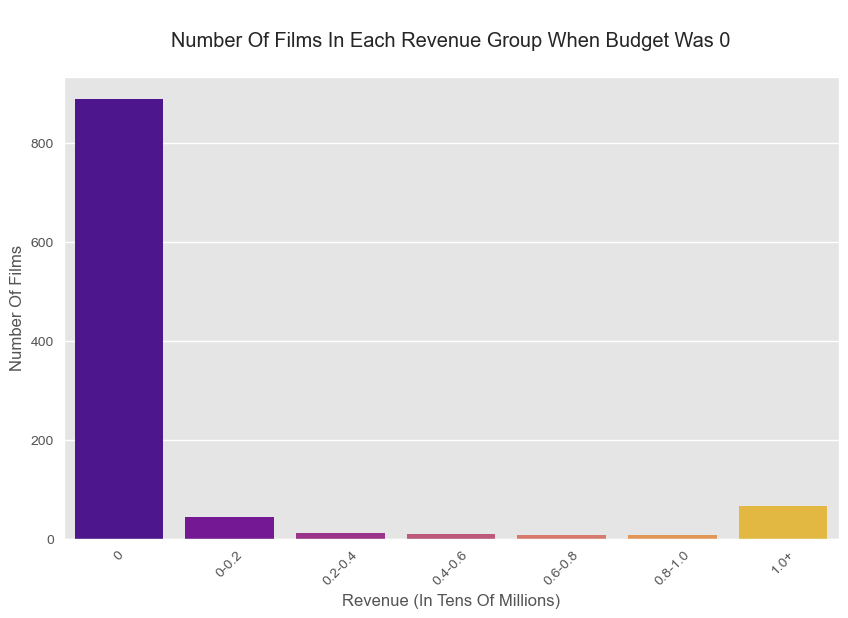

In [202]:
def revenue_group(x):
    if x == 0:
        return '0'
    if x <= 2000000:
        return '0-0.2'
    if x <= 4000000:
        return '0.2-0.4'
    if x <= 6000000:
        return '0.4-0.6'
    if x <= 8000000:
        return '0.6-0.8'
    if x <= 10000000:
        return '0.8-1.0'
    else:
        return '1.0+'

budget_df['revenue_group'] = budget_df['revenue'].apply(revenue_group)

plt.figure(figsize=(10, 6))
sns.countplot(data = budget_df,
              x = 'revenue_group',
              palette = 'plasma',
              order = ['0','0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0+'])
plt.xlabel('Revenue (In Tens Of Millions)')
plt.ylabel('Number Of Films')
plt.title('\nNumber Of Films In Each Revenue Group When Budget Was 0\n')
plt.xticks(rotation=45) 
plt.show()
              

From this graph, we can see there are films making more than 10,000,000 in revenue despite the films' budgets being 0.

In [ ]:
def budget_group(x):
    if x <= 2000000:
        return '0-0.2'
    if x <= 4000000:
        return '0.2-0.4'
    if x <= 6000000:
        return '0.4-0.6'
    if x <= 8000000:
        return '0.6-0.8'
    if x <= 10000000:
        return '0.8-1.0'
    else:
        return '1.0+'

budget_df['budget_group'] = budget_df['budget'].apply(budget_group)

plt.figure(figsize=(10, 6))
sns.countplot(data = budget_df,
              x = 'budget_group',
              palette = 'magma',
              order = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0+'])
plt.xlabel('Budget (In Tens Of Millions)')
plt.ylabel('Number Of Films')
plt.title('\nNumber Of Films In Each Budget Group When Budget Was 0\n')
plt.xticks(rotation=45) 
plt.show()
           

In [203]:
# Creating a new dataframe where the budget is 0 but the revenue is greater than or equal to 10000000
unlikely_df = df[(df['budget'] == 0) & (df['revenue'] >= 10000000)].copy()
unlikely_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",...,2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,[Comedy]
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428,"[Adventure, Animation, Comedy, Family]"
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85,"[Drama, Music]"
475,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,9433,"[{""id"": 1003, ""name"": ""photographer""}, {""id"": ...",en,The Edge,The plane carrying wealthy Charles Morse crash...,20.632673,"[{""name"": ""Art Linson Productions"", ""id"": 8769}]",...,1997-09-06,43312294,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,They were fighting over a woman when the plane...,The Edge,6.7,349,"[Action, Adventure, Drama]"
489,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 107...",http://oceans-lefilm.com/,36970,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 658, ""na...",en,Oceans,"An ecological drama/documentary, filmed throug...",10.706613,"[{""name"": ""Path\u00e9 Films"", ""id"": 4959}, {""n...",...,2009-10-17,19406406,84.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Explore the depths of our planet's oceans. Ex...,Oceans,7.3,111,"[Documentary, Family]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 99, ""nam...",http://kevinhartnation.com/portfolio/let-me-ex...,181330,"[{""id"": 9716, ""name"": ""stand-up comedy""}, {""id...",en,Kevin Hart: Let Me Explain,"Captures the laughter, energy and mayhem from ...",9.799357,"[{""name"": ""Hartbeat Productions"", ""id"": 40268}]",...,2013-07-03,32230907,74.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the rise of a legend,Kevin Hart: Let Me Explain,7.1,95,"[Comedy, Documentary]"
4093,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 28,...",NaN,11194,"[{""id"": 2820, ""name"": ""wound""}, {""id"": 4560, ""...",en,Touching the Void,A documentary based on the book of the same na...,14.045887,"[{""name"": ""Darlow Smithson Productions"", ""id"":...",...,2003-09-05,13885802,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Touching the Void,7.6,138,"[Documentary, Action, Adventure]"
4192,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/underthesamemoon,32579,"[{""id"": 10183, ""name"": ""independent film""}, {""...",es,La misma luna,Tells the parallel stories of nine-year-old Ca...,2.756435,"[{""name"": ""The Weinstein Company"", ""id"": 308},...",...,2008-03-20,23311391,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The love between a mother and a son knows no 

In [196]:
# Getting a random sample from those films
random_titles = unlikely_df['title'].sample(n=5)
print(random_titles)

3206                   Polisse
2297            The Book Thief
897             Deck the Halls
1626    My Super Ex-Girlfriend
4010        That Thing You Do!
Name: title, dtype: object
